In [ ]:
# EN : Monte Carlo Pricing of a European Barrier Option
# FR : Pricing d'une option barrière avec la méthode de Monte Carlo 

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialise parameters
S0 = 100      # initial stock price
K = 100       # strike price
T = 1         # time to maturity in years
H = 125       # up-and-out barrier price/value
r = 0.01      # annual risk-free rate
vol = 0.2     # volatility (%)

N = 100       # number of time steps
M = 1000      # number of simulations

In [3]:
start_time = time.time()

# Precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Standard Error Placeholders
sum_CT = 0
sum_CT2 = 0

# Monte Carlo Method
for i in range(M):

    # Barrier Crossed Flag
    BARRIER = False
    St = S0

    for j in range(N):
        epsilon = np.random.normal()
        Stn = St*np.exp( nudt + volsdt*epsilon )
        St = Stn
        if St >= H:
            BARRIER = True
            break

    if BARRIER:
        CT = 0
    else:
        CT = max(0, K - St)

    sum_CT = sum_CT + CT
    sum_CT2 = sum_CT2 + CT*CT

# Compute Expectation and SE
C0 = np.exp(-r*T)*sum_CT/M
sigma = np.sqrt( (sum_CT2 - sum_CT*sum_CT/M)*np.exp(-2*r*T) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $7.08 with SE +/- 0.315
Computation time is:  0.1049


In [4]:
start_time = time.time()

#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)

# Monte Carlo Method
Z = np.random.normal(size=(N, M))
delta_St = nudt + volsdt*Z
ST = S0*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S0), ST ) )

# Copy numpy array for plotting
S = np.copy(ST)

# Apply Barrier Condition to ST numpy array
mask = np.any(ST >= H, axis=0)
ST[:,mask] = 0

CT = np.maximum(0, K - ST[-1][ST[-1] != 0])
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
print("Computation time is: ", round(time.time() - start_time,4))

Call value is $8.07 with SE +/- 0.351
Computation time is:  0.0085


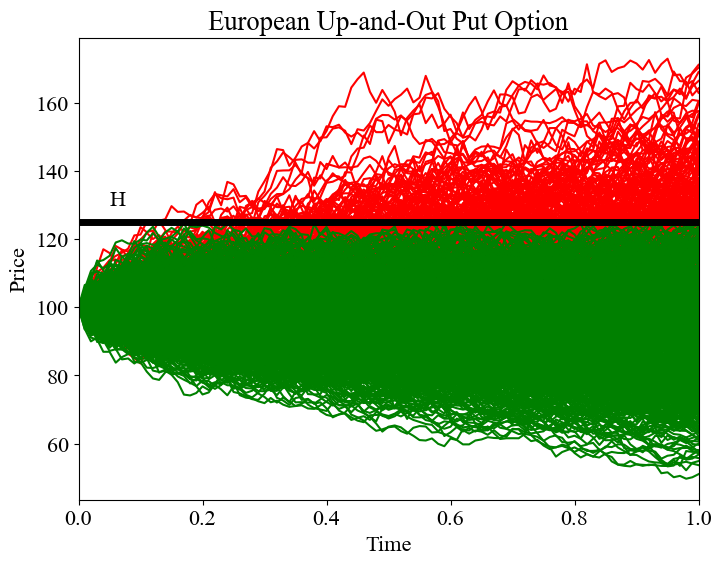

In [5]:
plt.figure(figsize=(8,6))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

plt.plot(np.linspace(0,T,N+1),S[:,mask],'r')
plt.plot(np.linspace(0,T,N+1),S[:,~mask],'g')
plt.plot([0,T],[H,H], 'k-',linewidth=5.0)
plt.annotate('H', (0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Up-and-Out Put Option')

plt.show()